In [1]:
import numpy as np
import pandas as pd

In [112]:
data = pd.read_csv(r"C:\Users\97798\Desktop\movie_statistic_dataset.csv")

In [113]:
data.drop('movie_title', axis =1 ,inplace = True)

In [114]:
data['production_year'] = data.production_date.str.split('-').str.get(0)

In [115]:
data.drop('production_date', axis =1, inplace = True)

In [116]:
data.production_year

0       2022
1       2019
2       2011
3       2015
4       2018
        ... 
4375    2004
4376    1995
4377    2001
4378    2010
4379    2015
Name: production_year, Length: 4380, dtype: object

In [117]:
data

,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,production_year
0,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552,2022
1,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755,2019
2,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802,2011
3,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979,2015
4,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,Documentary,100.0,Morgan Spurlock,"producer,writer,director",1970,alive,7.2,110078.0,6.017902,65000,11529368,22233808,2004
4376,"Comedy,Drama,Romance",98.0,Edward Burns,"actor,writer,producer",1968,alive,6.6,7986.0,4.231464,50000,10426506,10426506,1995
4377,"Drama,Romance",93.0,Vincent Jay Miller,"producer,director,writer",1973,alive,4.9,1593.0,2.526405,50000,2335352,2335352,2001
4378,"Comedy,Drama,Romance",98.0,Lena Dunham,"writer,actress,producer",1986,alive,6.2,14595.0,4.242085,50000,391674,424149,2010


In [118]:
X = data.drop(['movie_averageRating'], axis =1)

In [119]:
y = data['movie_averageRating']

In [120]:
X

,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,production_year
0,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,277543.0,7.061101,460000000,667830256,2265935552,2022
1,"Action,Adventure,Drama",181.0,-,-,-,-,1143642.0,8.489533,400000000,858373000,2794731755,2019
2,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,533763.0,6.272064,379000000,241071802,1045713802,2011
3,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,870573.0,7.214013,365000000,459005868,1395316979,2015
4,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,1091968.0,8.460958,300000000,678815482,2048359754,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
4375,Documentary,100.0,Morgan Spurlock,"producer,writer,director",1970,alive,110078.0,6.017902,65000,11529368,22233808,2004
4376,"Comedy,Drama,Romance",98.0,Edward Burns,"actor,writer,producer",1968,alive,7986.0,4.231464,50000,10426506,10426506,1995
4377,"Drama,Romance",93.0,Vincent Jay Miller,"producer,director,writer",1973,alive,1593.0,2.526405,50000,2335352,2335352,2001
4378,"Comedy,Drama,Romance",98.0,Lena Dunham,"writer,actress,producer",1986,alive,14595.0,4.242085,50000,391674,424149,2010


In [121]:
y

0       7.8
1       8.4
2       6.6
3       7.3
4       8.4
       ... 
4375    7.2
4376    6.6
4377    4.9
4378    6.2
4379    6.2
Name: movie_averageRating, Length: 4380, dtype: float64

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [126]:
X_test['main_genre'] = X_test.genres.str.split(',').str.get(0)

In [129]:
X_test.drop(['genres'], axis =1, inplace=True)

In [133]:
X_test['director_main_profession'] = X_test.director_professions.str.split(',').str.get(0)

In [136]:
X_test.drop(['director_professions'], axis =1, inplace=True)

In [137]:
X_test

,runtime_minutes,director_name,director_birthYear,director_deathYear,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,production_year,main_genre,director_main_profession
1139,105.0,Mike Nichols,1931,2014,9620.0,3.647059,50000000,6291602,6291602,2000,Comedy,director
1376,95.0,Anne Fletcher,1966,alive,37872.0,4.366804,40000000,37134215,41294674,2012,Comedy,miscellaneous
2670,91.0,Jonathan Liebesman,1976,alive,74267.0,4.654191,16000000,39517763,50517763,2006,Horror,director
2603,105.0,Christian Volckman,\N,alive,16191.0,4.574666,18000000,70644,2401413,2006,Action,director
3757,85.0,Paul Solet,\N,alive,8078.0,3.310299,5000000,8297,8297,2009,Drama,writer
...,...,...,...,...,...,...,...,...,...,...,...,...
1184,116.0,Edward Zwick,1952,alive,56196.0,5.178937,46000000,59003384,100833145,1996,Action,producer
981,119.0,Steve Antin,1958,alive,87558.0,5.226819,55000000,39440655,90552675,2010,Drama,actor
1833,110.0,Willard Huyck,1945,alive,48160.0,3.596717,30000000,16295774,16295774,1986,Action,writer
2682,93.0,Michael Dowse,1973,alive,48553.0,4.790386,16000000,22370452,29634023,2019,Action,director


In [138]:
X_train

,runtime_minutes,director_name,director_birthYear,director_deathYear,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,production_year,main_genre,director_main_profession
2095,98.0,Don Michael Paul,\N,alive,16102.0,3.146590,25000000,15567860,19233280,2002,Action,actor
4341,97.0,Ava DuVernay,1972,alive,1893.0,3.532436,200000,236806,236806,2012,Drama,producer
1104,95.0,Rob Reiner,1947,alive,24267.0,4.251154,50000000,27100030,27100030,1999,Comedy,actor
1302,119.0,David Dobkin,1969,alive,360652.0,6.458269,40000000,209218368,283218368,2005,Comedy,producer
1344,113.0,Jaume Collet-Serra,1974,alive,263594.0,6.113132,40000000,63686397,136123083,2011,Action,director
...,...,...,...,...,...,...,...,...,...,...,...,...
3131,149.0,Stanley Kubrick,1928,1999,674585.0,8.064538,10500000,59936321,71801313,1968,Adventure,director
3839,97.0,William Eubank,\N,alive,66756.0,4.772157,4000000,600896,2665322,2014,Drama,cinematographer
2789,90.0,Jay Russell,\N,alive,24367.0,4.773165,15000000,19161999,19344615,2002,Drama,director
1635,114.0,Brian De Palma,1940,alive,36420.0,4.659221,35000000,6630252,16830252,2002,Crime,director


In [146]:
X_test.director_birthYear=X_test.director_birthYear.replace(r'\N',np.nan)

In [149]:
X_test

,runtime_minutes,director_name,director_birthYear,director_deathYear,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,production_year,main_genre,director_main_profession
1139,105.0,Mike Nichols,1931,2014,9620.0,3.647059,50000000,6291602,6291602,2000,Comedy,director
1376,95.0,Anne Fletcher,1966,alive,37872.0,4.366804,40000000,37134215,41294674,2012,Comedy,miscellaneous
2670,91.0,Jonathan Liebesman,1976,alive,74267.0,4.654191,16000000,39517763,50517763,2006,Horror,director
2603,105.0,Christian Volckman,NaN,alive,16191.0,4.574666,18000000,70644,2401413,2006,Action,director
3757,85.0,Paul Solet,NaN,alive,8078.0,3.310299,5000000,8297,8297,2009,Drama,writer
...,...,...,...,...,...,...,...,...,...,...,...,...
1184,116.0,Edward Zwick,1952,alive,56196.0,5.178937,46000000,59003384,100833145,1996,Action,producer
981,119.0,Steve Antin,1958,alive,87558.0,5.226819,55000000,39440655,90552675,2010,Drama,actor
1833,110.0,Willard Huyck,1945,alive,48160.0,3.596717,30000000,16295774,16295774,1986,Action,writer
2682,93.0,Michael Dowse,1973,alive,48553.0,4.790386,16000000,22370452,29634023,2019,Action,director


In [152]:
X_test.director_deathYear = X_test.director_deathYear.apply(classify)

In [158]:
def c(a):
    if '-' in a:
        return 'Unknown'

In [203]:
X_train.isna().sum()

runtime_minutes             0
director_name               0
director_birthYear          0
director_deathYear          0
movie_numerOfVotes          0
approval_Index              0
Production budget $         0
Domestic gross $            0
Worldwide gross $           0
production_year             0
main_genre                  0
director_main_profession    0
dtype: int64

In [202]:
X_test.isna().sum()

runtime_minutes             0
director_name               0
director_birthYear          0
director_deathYear          0
movie_numerOfVotes          0
approval_Index              0
Production budget $         0
Domestic gross $            0
Worldwide gross $           0
production_year             0
main_genre                  0
director_main_profession    0
dtype: int64

In [175]:
X_test.director_birthYear=X_test.director_birthYear.replace('-',np.nan)

In [176]:
X_test.director_birthYear= X_test.director_birthYear.replace(np.nan, 1965)

In [178]:
X_train.dtypes

runtime_minutes             float64
director_name                object
director_birthYear           object
director_deathYear           object
movie_numerOfVotes          float64
approval_Index              float64
Production budget $           int64
Domestic gross $              int64
Worldwide gross $             int64
production_year              object
main_genre                   object
director_main_profession     object
dtype: object

In [188]:
X_test.production_yearo=X_test.director_birthYear.astype('float')

In [199]:
X_train.dtypes

runtime_minutes             float64
director_name                object
director_birthYear            int32
director_deathYear           object
movie_numerOfVotes          float64
approval_Index              float64
Production budget $           int64
Domestic gross $              int64
Worldwide gross $             int64
production_year               int32
main_genre                   object
director_main_profession     object
dtype: object

In [198]:
X_test.dtypes

runtime_minutes             float64
director_name                object
director_birthYear            int32
director_deathYear           object
movie_numerOfVotes          float64
approval_Index              float64
Production budget $           int64
Domestic gross $              int64
Worldwide gross $             int64
production_year               int32
main_genre                   object
director_main_profession     object
dtype: object

In [196]:
X_test.production_year=X_test.production_year.astype('int')

In [197]:
X_test

,runtime_minutes,director_name,director_birthYear,director_deathYear,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,production_year,main_genre,director_main_profession
1139,105.0,Mike Nichols,1931,Dead,9620.0,3.647059,50000000,6291602,6291602,2000,Comedy,director
1376,95.0,Anne Fletcher,1966,Alive,37872.0,4.366804,40000000,37134215,41294674,2012,Comedy,miscellaneous
2670,91.0,Jonathan Liebesman,1976,Alive,74267.0,4.654191,16000000,39517763,50517763,2006,Horror,director
2603,105.0,Christian Volckman,1965,Alive,16191.0,4.574666,18000000,70644,2401413,2006,Action,director
3757,85.0,Paul Solet,1965,Alive,8078.0,3.310299,5000000,8297,8297,2009,Drama,writer
...,...,...,...,...,...,...,...,...,...,...,...,...
1184,116.0,Edward Zwick,1952,Alive,56196.0,5.178937,46000000,59003384,100833145,1996,Action,producer
981,119.0,Steve Antin,1958,Alive,87558.0,5.226819,55000000,39440655,90552675,2010,Drama,actor
1833,110.0,Willard Huyck,1945,Alive,48160.0,3.596717,30000000,16295774,16295774,1986,Action,writer
2682,93.0,Michael Dowse,1973,Alive,48553.0,4.790386,16000000,22370452,29634023,2019,Action,director


In [200]:
numerical_features = X_train.select_dtypes(exclude='object')

In [201]:
numerical_features

,runtime_minutes,director_birthYear,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,production_year
2095,98.0,1965,16102.0,3.146590,25000000,15567860,19233280,2002
4341,97.0,1972,1893.0,3.532436,200000,236806,236806,2012
1104,95.0,1947,24267.0,4.251154,50000000,27100030,27100030,1999
1302,119.0,1969,360652.0,6.458269,40000000,209218368,283218368,2005
1344,113.0,1974,263594.0,6.113132,40000000,63686397,136123083,2011
...,...,...,...,...,...,...,...,...
3131,149.0,1928,674585.0,8.064538,10500000,59936321,71801313,1968
3839,97.0,1965,66756.0,4.772157,4000000,600896,2665322,2014
2789,90.0,1965,24367.0,4.773165,15000000,19161999,19344615,2002
1635,114.0,1940,36420.0,4.659221,35000000,6630252,16830252,2002


In [204]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [205]:
corr_features = correlation(numerical_features, 0.85)

In [206]:
corr_features

{'Worldwide gross $'}

In [250]:
X_train.drop('director_name', axis =1, inplace = True)
X_test.drop('director_name', axis =1, inplace = True)
categorical_features.drop('director_name', axis =1, inplace = True)

In [251]:
numerical_features

,runtime_minutes,director_birthYear,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,production_year
2095,98.0,1965,16102.0,3.146590,25000000,15567860,2002
4341,97.0,1972,1893.0,3.532436,200000,236806,2012
1104,95.0,1947,24267.0,4.251154,50000000,27100030,1999
1302,119.0,1969,360652.0,6.458269,40000000,209218368,2005
1344,113.0,1974,263594.0,6.113132,40000000,63686397,2011
...,...,...,...,...,...,...,...
3131,149.0,1928,674585.0,8.064538,10500000,59936321,1968
3839,97.0,1965,66756.0,4.772157,4000000,600896,2014
2789,90.0,1965,24367.0,4.773165,15000000,19161999,2002
1635,114.0,1940,36420.0,4.659221,35000000,6630252,2002


In [252]:
categorical_features = X_train.select_dtypes(include='object')

In [347]:
categorical_features.main_genre.value_counts()

main_genre
Action         956
Comedy         889
Drama          600
Adventure      347
Biography      229
Crime          220
Horror         158
Documentary     39
Fantasy         19
Animation       16
Mystery          9
Thriller         6
Family           4
Sci-Fi           4
\N               2
Film-Noir        2
Musical          2
Music            1
Romance          1
Name: count, dtype: int64

In [382]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'),categorical_features.columns),
        ('num_tnf', MinMaxScaler(feature_range=(0,1)), numerical_features.columns)
    ],
    remainder='passthrough'
)

In [383]:
preprocessor


ColumnTransformer(remainder='passthrough',
                  transformers=[('col_tnf',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 Index(['director_deathYear', 'main_genre', 'director_main_profession'], dtype='object')),
                                ('num_tnf', MinMaxScaler(),
                                 Index(['runtime_minutes', 'director_birthYear', 'movie_numerOfVotes',
       'approval_Index', 'Production budget $', 'Domestic gross $',
       'production_year'],
      dtype='object'))])

In [384]:
from sklearn.linear_model import LinearRegression

In [385]:
step2 = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)


In [386]:
step3 = PCA(n_components=2)

In [387]:
from sklearn.decomposition import PCA

In [398]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('Transform', preprocessor),
#     ('pca',step3),
    ('lr', step2),
    
])


In [399]:
pipe.fit(X_train, y_train)

C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('Transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['director_deathYear', 'main_genre', 'director_main_profession'], dtype='object')),
                                                 ('num_tnf', MinMaxScaler(),
                                                  Index(['runtime_minutes', 'director_birthYear', 'movie_numerOfVotes',
       'approval_Index', 'Production budget $', 'Domestic gross $',
       'production_year'],
      dtype='object'))])),
                ('lr', LinearRegression())])

In [400]:
y_pred = pipe.predict(X_test)

C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [401]:
y_pred

array([5.45219507, 6.01185035, 5.81520246, 6.03341439, 5.46132681,
       6.36312693, 6.09555695, 8.0209822 , 5.51275528, 5.22874613,
       7.61083466, 5.49515082, 7.02246741, 7.73937954, 5.18206915,
       7.24386707, 4.83433684, 6.34001916, 6.82774982, 5.09502366,
       5.94156746, 6.82944952, 5.51979465, 4.98909293, 6.9507536 ,
       6.55613405, 3.98567257, 5.2174873 , 4.80375855, 7.57460173,
       6.61703026, 8.45624171, 6.05636947, 6.88106719, 6.77225926,
       7.51475823, 6.00461564, 7.22879809, 6.39011257, 5.98584973,
       6.2415352 , 7.72467761, 7.01442669, 7.52085236, 7.85065763,
       7.1004416 , 6.57019749, 6.7767054 , 5.4470186 , 6.41455972,
       7.45849223, 7.6160967 , 5.25839467, 5.93906237, 4.9781319 ,
       7.59185295, 7.13555114, 6.55010257, 6.04159904, 6.53348286,
       6.69489151, 6.33308226, 6.85459286, 7.6359987 , 7.38348216,
       6.16736713, 7.06871154, 5.66119525, 6.01730601, 5.85493003,
       6.75406556, 5.81133736, 5.18244934, 6.46893644, 5.66516

In [402]:
y_test

1139    5.6
1376    5.8
2670    5.8
2603    6.6
3757    5.2
       ... 
1184    6.6
981     6.4
1833    4.7
2682    6.2
653     6.6
Name: movie_averageRating, Length: 876, dtype: float64

In [403]:
diff = pd.DataFrame(
{
    'Actual':y_test,
    'Predicted':y_pred
})

In [404]:
diff

,Actual,Predicted
1139,5.6,5.452195
1376,5.8,6.011850
2670,5.8,5.815202
2603,6.6,6.033414
3757,5.2,5.461327
...,...,...
1184,6.6,6.385616
981,6.4,6.832840
1833,4.7,5.393050
2682,6.2,6.072346


In [405]:
from sklearn.metrics import *


In [397]:
r2_score(y_test, y_pred)

0.022899792293283094

<Axes: >

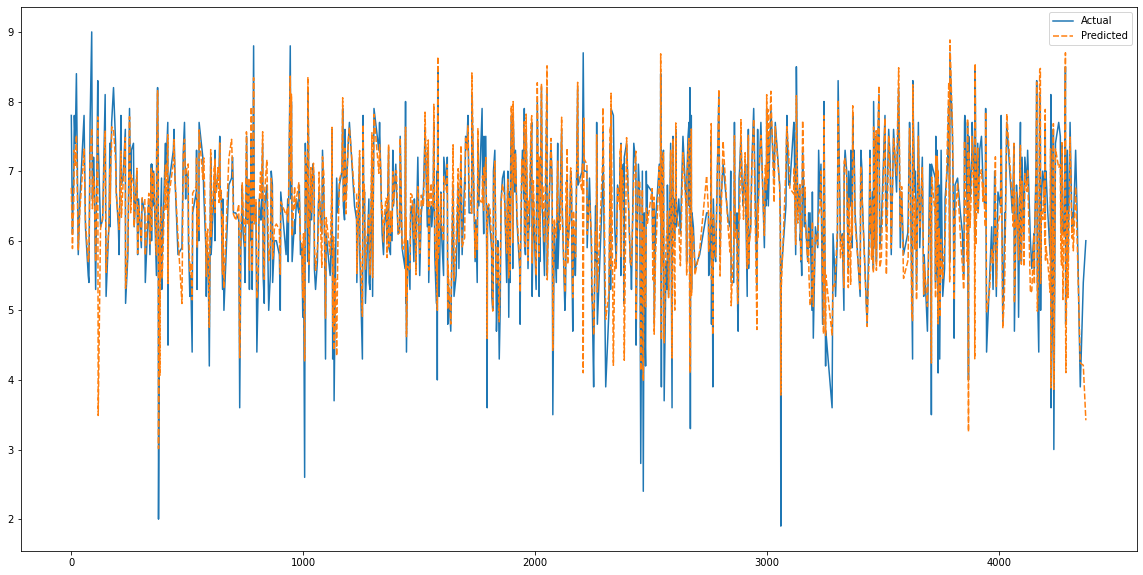

In [366]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
sns.lineplot(data = diff)

<Axes: xlabel='Actual', ylabel='Predicted'>

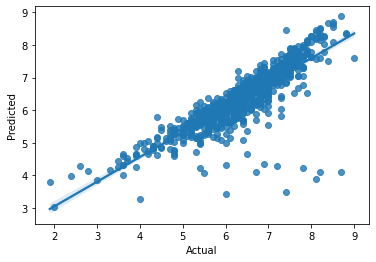

In [367]:
sns.regplot(data = diff,x= 'Actual', y='Predicted')

In [310]:
grid_search.best_params_

{'lr__copy_X': True,
 'lr__fit_intercept': True,
 'lr__n_jobs': None,
 'lr__positive': False}

In [312]:
pipe.fit(X_train, y_train)

C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('Transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['director_deathYear', 'main_genre', 'director_main_profession'], dtype='object')),
                                                 ('num_tnf', StandardScaler(),
                                                  Index(['runtime_minutes', 'director_birthYear', 'movie_numerOfVotes',
       'approval_Index', 'Production budget $', 'Domestic gross $',
       'production_year'],
      dtype='object'))])),
                ('lr', LinearRegression())])

In [406]:
mean_absolute_error(y_test,y_pred)

0.3287666206074483

In [329]:
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Define the parameter grid
param_grid = {
#     'Transform__col_tnf__drop': [None, 'first'],
#     'Transform__col_tnf__handle_unknown': ['error', 'ignore'],
    'lr__fit_intercept': [True, False],
    'lr__copy_X': [True, False],
    'lr__n_jobs': [None, 1, 2, 4],
    'lr__positive': [True, False]
}

# Create the pipeline
# step1 = ColumnTransformer(
#     transformers=[
#         ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), categorical_features.columns),
#         ('num_tnf', StandardScaler(), numerical_features.columns)
#     ],
#     remainder='passthrough'
# )
# step2 = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)

# pipe = Pipeline([
#     ('Transform', step1),
#     ('lr', step2)
# ])

# Perform grid search
grid_search = GridSearchCV(pipe, param_grid)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)


C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `spa

Best Parameters: {'lr__copy_X': True, 'lr__fit_intercept': True, 'lr__n_jobs': None, 'lr__positive': False}


C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `spa